# Exploratory Analysis of Geolocational Data

## Data Collection 

In [1]:
import pandas as pd
data=pd.read_csv("dataset/food_coded.csv")

In [2]:
data.head()

GPA  Gender  breakfast  calories_chicken  calories_day  calories_scone  \
0    2.4       2          1               430           NaN           315.0   
1  3.654       1          1               610           3.0           420.0   
2    3.3       1          1               720           4.0           420.0   
3    3.2       1          1               430           3.0           420.0   
4    3.5       1          1               720           2.0           420.0   

   coffee                      comfort_food        comfort_food_reasons  \
0       1                              none       we dont have comfort    
1       2       chocolate, chips, ice cream        Stress, bored, anger   
2       2   frozen yogurt, pizza, fast food             stress, sadness   
3       2  Pizza, Mac and cheese, ice cream                     Boredom   
4       2      Ice cream, chocolate, chips   Stress, boredom, cravings    

   comfort_food_reasons_coded  ...  soup  sports  thai_food tortilla_calories  \
0                         9.0  ...   1.0     1.0          1            1165.0   
1                         1.0  ...   1.0     1.0          2             725.0   
2                         1.0  ...   1.0     2.0          5            1165.0   
3                         2.0  ...   1.0     2.0          5             725.0   
4                         1.0  ...   1.0     1.0          4             940.0   

   turkey_calories  type_sports veggies_day  vitamins  waffle_calories  \
0              345   car racing           5         1             1315   
1              690  Basketball            4         2              900   
2              500         none           5         1              900   
3              690          NaN           3         1             1315   
4              500     Softball           4         2              760   

                     weight  
0                       187  
1                       155  
2  I'm not answering this.   
3             Not sure, 240  
4                       190  

[5 rows x 61 columns]

# Data Cleaning

The process of Extracting the features, (and dealing with different kinds of values as well as NaN values) is known as Data Cleaning.

In [3]:
data.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [4]:
column=['cook','eating_out','employment', 'exercise','income','sports']

In [5]:
data=data[column]

In [6]:
data.head()

cook  eating_out  employment  exercise  income  sports
0   2.0           3         3.0       1.0     5.0     1.0
1   3.0           2         2.0       1.0     4.0     1.0
2   1.0           2         3.0       2.0     6.0     2.0
3   2.0           2         3.0       3.0     6.0     2.0
4   1.0           2         2.0       1.0     6.0     1.0

## Data Exploration and Visualisation




# Boxplot of Dataset

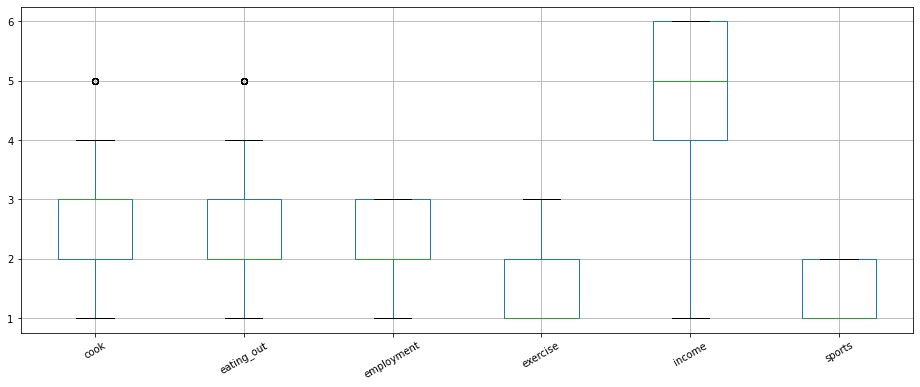

In [7]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ax=data.boxplot(figsize=(16,6), rot=30)

In [8]:
print(data.isna().sum(), data.shape, sep='\n')

cook           3
eating_out     0
employment     9
exercise      13
income         1
sports         2
dtype: int64
(125, 6)


In [9]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [10]:
data.index

RangeIndex(start=0, stop=100, step=1)

In [11]:
print(data.isna().sum(), data.shape, sep='\n')

cook          0
eating_out    0
employment    0
exercise      0
income        0
sports        0
dtype: int64
(100, 6)


## Run KMeans Clustering on the data

In [12]:
## for data
import numpy as np
import pandas as pd
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for geospatial
import folium
## for machine learning
from sklearn import preprocessing, cluster
import scipy

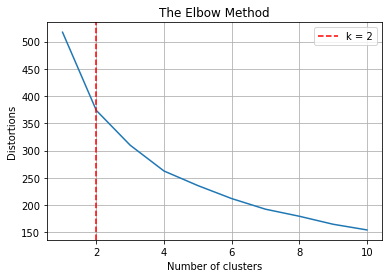

In [13]:
X = data.copy()
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the max second derivative
k = 0
max = float('-inf')
for i in range(1, len(distortions)-1):
    num = distortions[i+1] + distortions[i-1] - 2 * distortions[i]
    if max < num:
        max = num
        k = i + 1
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortions")
ax.legend()
ax.grid(True)
plt.show()

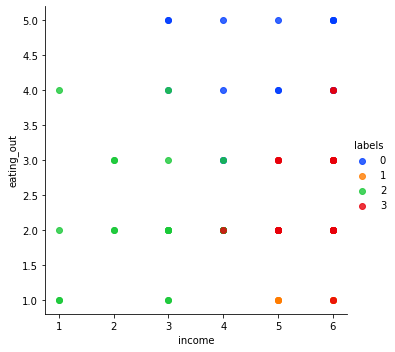

In [14]:
model = cluster.KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
model.fit(X)

labels = pd.DataFrame(model.labels_)
labeled_preferences = pd.concat((X, labels), axis=1)
labeled_preferences = labeled_preferences.rename({0:'labels'}, axis=1)

sns.lmplot(x='income',y='eating_out',data=labeled_preferences, hue='labels', palette='bright', fit_reg=False)

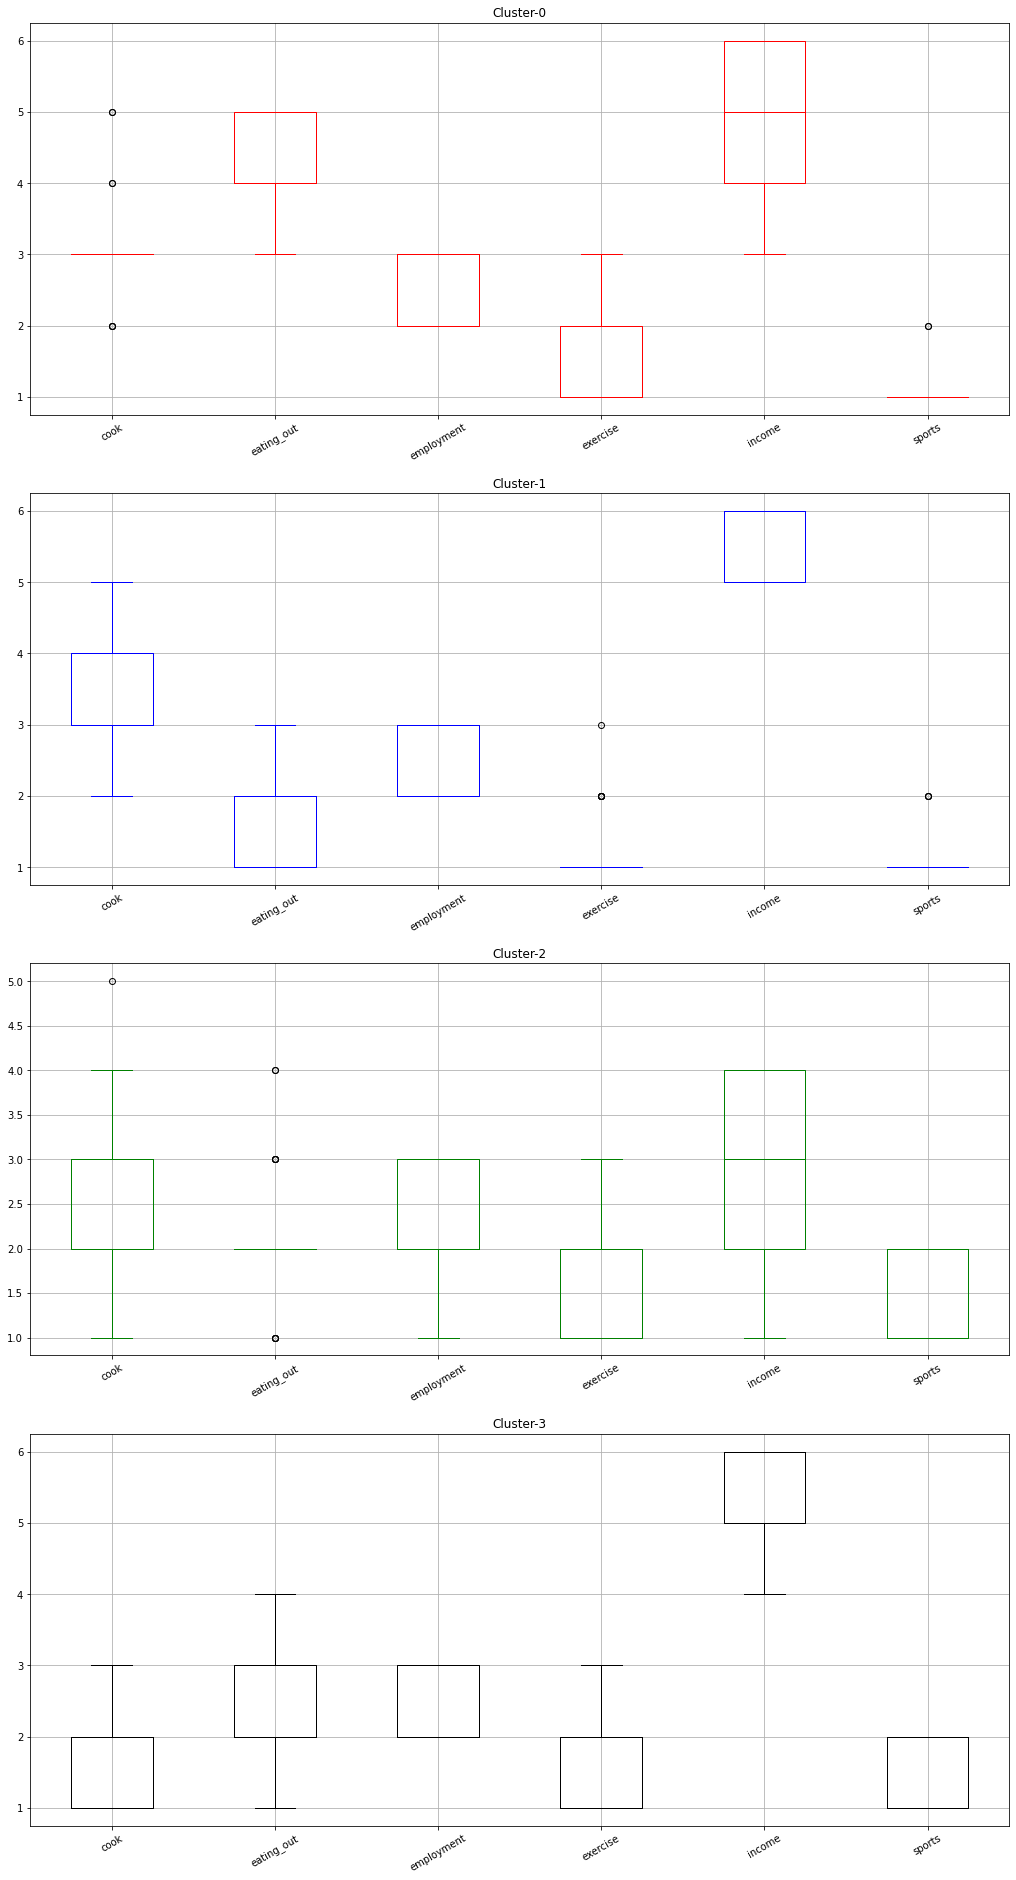

In [15]:
fig, axs = plt.subplots(4,figsize=(14,26), constrained_layout = True)

df1=labeled_preferences[labeled_preferences['labels']==0.0].copy()
df2=labeled_preferences[labeled_preferences['labels']==1.0].copy()
df3=labeled_preferences[labeled_preferences['labels']==2.0].copy()
df4=labeled_preferences[labeled_preferences['labels']==3.0].copy()

df1.drop(['labels'], axis=1, inplace=True)
df2.drop(['labels'], axis=1, inplace=True)
df3.drop(['labels'], axis=1, inplace=True)
df4.drop(['labels'], axis=1, inplace=True)

df1.boxplot(ax=axs[0], rot=30, color='r')
df2.boxplot(ax=axs[1], rot=30, color='b')
df3.boxplot(ax=axs[2], rot=30, color='g')
df4.boxplot(ax=axs[3], rot=30, color='k')

axs[0].title.set_text("Cluster-0")
axs[1].title.set_text("Cluster-1")
axs[2].title.set_text("Cluster-2")
axs[3].title.set_text("Cluster-3")

plt.show()

## Get Geolocational Data

In [3]:
import folium
from functools import partial
from geopy.geocoders import Nominatim
from geopy.point import Point
import requests
import json

In [4]:
neighbourhood=pd.read_csv("dataset/Census_Neighbourhoods_2016.csv")
neighbourhood.head()

OBJECTID  NEWCODE                             NEWCDTXT Municipality
0         1       11  Forest Heights/Forest Hill/Lakeside    Kitchener
1         2        1                        West Waterloo     Waterloo
2         3       15       Frederick/Rosemount/Auditorium    Kitchener
3         4       13        Bridgeport/Breithaupt/Mt Hope    Kitchener
4         5        9                            Westmount     Waterloo

## Data Cleaning Process for Extracting Necessary Columns in the Dataset

In [18]:
neighbourhood.drop(['OBJECTID', 'NEWCODE'], axis=1, inplace=True)
neighbourhood.rename(columns={'NEWCDTXT':'Neighbourhood'}, inplace=True)
neighbourhood.head()

Neighbourhood Municipality
0  Forest Heights/Forest Hill/Lakeside    Kitchener
1                        West Waterloo     Waterloo
2       Frederick/Rosemount/Auditorium    Kitchener
3        Bridgeport/Breithaupt/Mt Hope    Kitchener
4                            Westmount     Waterloo

In [19]:
neighbourhood['Neighbourhood']=neighbourhood['Neighbourhood'].astype(str).str.split('/')
neighbourhood = neighbourhood.explode('Neighbourhood')
neighbourhood.reset_index(drop=True, inplace=True)
neighbourhood

Neighbourhood Municipality
0   Forest Heights    Kitchener
1      Forest Hill    Kitchener
2         Lakeside    Kitchener
3    West Waterloo     Waterloo
4        Frederick    Kitchener
..             ...          ...
57      New Dundee       Wilmot
58        Mannheim       Wilmot
59     Grand River    Kitchener
60    Stanley Park    Kitchener
61        Chicopee    Kitchener

[62 rows x 2 columns]

In [20]:
## get location
geolocator = Nominatim(user_agent="MyCoder")
geocode = partial(geolocator.geocode, country_codes='ca', 
                  viewbox=[Point(43.2825, -80.6314),Point(43.5775, -80.1217)],
                  bounded=True, addressdetails=True)
location = neighbourhood.apply(lambda row: geocode(row['Neighbourhood']+','+row['Municipality']), axis=1)

In [21]:
df = pd.DataFrame((loc.latitude, loc.longitude)
             if loc is not None else np.nan for loc in location)
neighbourhood = pd.concat([neighbourhood, df], axis=1)
neighbourhood.rename(columns={0:'lat', 1:'long'}, inplace=True)
neighbourhood.head()

Neighbourhood Municipality        lat       long
0  Forest Heights    Kitchener  43.420740 -80.524760
1     Forest Hill    Kitchener  43.451291 -80.492782
2        Lakeside    Kitchener  43.432194 -80.498784
3   West Waterloo     Waterloo  43.465270 -80.522296
4       Frederick    Kitchener  43.449555 -80.487402

In [22]:
print(neighbourhood.isna().sum(), neighbourhood.shape)

Neighbourhood    0
Municipality     0
lat              1
long             1
dtype: int64 (62, 4)


In [23]:
neighbourhood.dropna(inplace=True)
neighbourhood.reset_index(drop=True, inplace=True)
print(neighbourhood.isna().sum(), neighbourhood.shape)

Neighbourhood    0
Municipality     0
lat              0
long             0
dtype: int64 (61, 4)


## Adding three more Columns Restaurant and Others
 

1.   Restaurant: Number of Restaurant in the radius of 2 km
2.   Fitness Centres: Number of Fitness Centres in the radius of 2 km
3.   Transport and Travel: Number of Transport and Travel in the radius of 2 km




In [24]:
def call_foursquare_api(lat, long, categoryId):
    CLIENT_ID = "TWHOX54VLSNYZBAZIM4OPQ45YHXNL4VOZPJTFK2UCSLQ3UYQ" # Foursquare ID
    CLIENT_SECRET = "AHUN5HMZPYZ3M01NH3QRVTHTSEQ5NIP2OOJKPD4ONJ35ZIDV" # Foursquare Secret
    VERSION = '20200316'
    LIMIT = 10000
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
      CLIENT_ID, 
      CLIENT_SECRET, 
      VERSION, 
      lat,long,
      2000,
      categoryId,
      100)
    res = requests.get(url).json()
    return res

In [25]:
resta=[]
fit = []
tran = []

food_id = '4d4b7105d754a06374d81259' #for food category
fitness_id = '4f4528bc4b90abdf24c9de85' #for athletic and sports
transport_id = '4d4b7105d754a06379d81259' #for travel and transport
for lat,long in zip(neighbourhood['lat'],neighbourhood['long']):
    food_res = call_foursquare_api(lat,long,food_id)
    fitness_res = call_foursquare_api(lat,long,fitness_id)
    transport_res = call_foursquare_api(lat,long,transport_id)
    
    restaurants = food_res['response']['groups'][0]['items']
    fitness_centres = fitness_res['response']['groups'][0]['items']
    transports = transport_res['response']['groups'][0]['items']
    
    resta.append(len(restaurants))
    fit.append(len(fitness_centres))
    tran.append(len(transports))

In [26]:
neighbourhood['restaurant']=resta
neighbourhood['fitness_centres']=fit
neighbourhood['transport']=tran

neighbourhood.head()

Neighbourhood Municipality        lat       long  restaurant  \
0  Forest Heights    Kitchener  43.420740 -80.524760          31   
1     Forest Hill    Kitchener  43.451291 -80.492782          78   
2        Lakeside    Kitchener  43.432194 -80.498784          38   
3   West Waterloo     Waterloo  43.465270 -80.522296         100   
4       Frederick    Kitchener  43.449555 -80.487402          71   

   fitness_centres  transport  
0                3          5  
1               12         15  
2                5          3  
3               20         29  
4               14         12

## Run K Means clustering on the dataset, with the optimal K value using Elbow Method

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

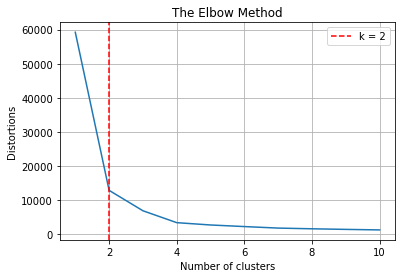

In [27]:
columns=['restaurant', 'fitness_centres', 'transport']
Z = neighbourhood[columns].copy()
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(Z) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(Z)
       distortions.append(model.inertia_)
## best k: the max second derivative
k = 0
max = float('-inf')
for i in range(1, len(distortions)-1):
    num = distortions[i+1] + distortions[i-1] - 2 * distortions[i]
    if max < num:
        max = num
        k = i + 1
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortions")
ax.legend()
ax.grid(True)
plt.show()

In [28]:
k=4
model = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
model.fit(Z)

labels = pd.DataFrame(model.labels_)
neighbourhood = pd.concat((neighbourhood, labels), axis=1)
neighbourhood = neighbourhood.rename({0:'cluster'}, axis=1)

In [29]:
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_,Z.values)
Z["centroid"] = 0
for i in closest:
    Z.loc[i, "centroid"] = 1
neighbourhood["centroid"] = Z["centroid"]
neighbourhood.head()

Neighbourhood Municipality        lat       long  restaurant  \
0  Forest Heights    Kitchener  43.420740 -80.524760          31   
1     Forest Hill    Kitchener  43.451291 -80.492782          78   
2        Lakeside    Kitchener  43.432194 -80.498784          38   
3   West Waterloo     Waterloo  43.465270 -80.522296         100   
4       Frederick    Kitchener  43.449555 -80.487402          71   

   fitness_centres  transport  cluster  centroid  
0                3          5        2         0  
1               12         15        1         0  
2                5          3        2         0  
3               20         29        3         0  
4               14         12        1         0

In [43]:
neighbourhood.drop(['cluster', 'centroid'], axis=1, inplace=True)

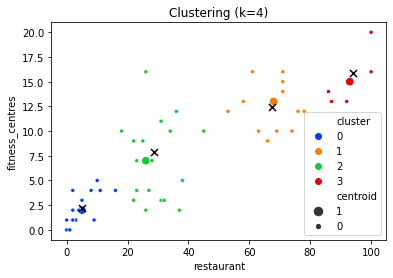

In [32]:
## plotc
fig, ax = plt.subplots()
sns.scatterplot(x="restaurant", y="fitness_centres", data=neighbourhood, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroid", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="x")
plt.show()

### Plot the clustered locations on a map

In [33]:
city = "Waterloo, Ontario"
location = geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

Waterloo, Region of Waterloo, Southwestern Ontario, Ontario, Canada
[lat, long]: [43.4652699, -80.5222961]


In [38]:
x, y = "lat", "long"
color = "cluster"
# size = "restaurant"
popup = "Neighbourhood"
marker = "centroid"
data = neighbourhood.copy()

## create color column
lst_elements = sorted(list(data[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]],popup=row[popup],
           radius=10, color=lst_colors[row[color]], fill=True).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           draggable=False,  popup=row[popup] ,       
           icon=folium.Icon(color="black")).add_to(map_), axis=1)

## plot the map
map_

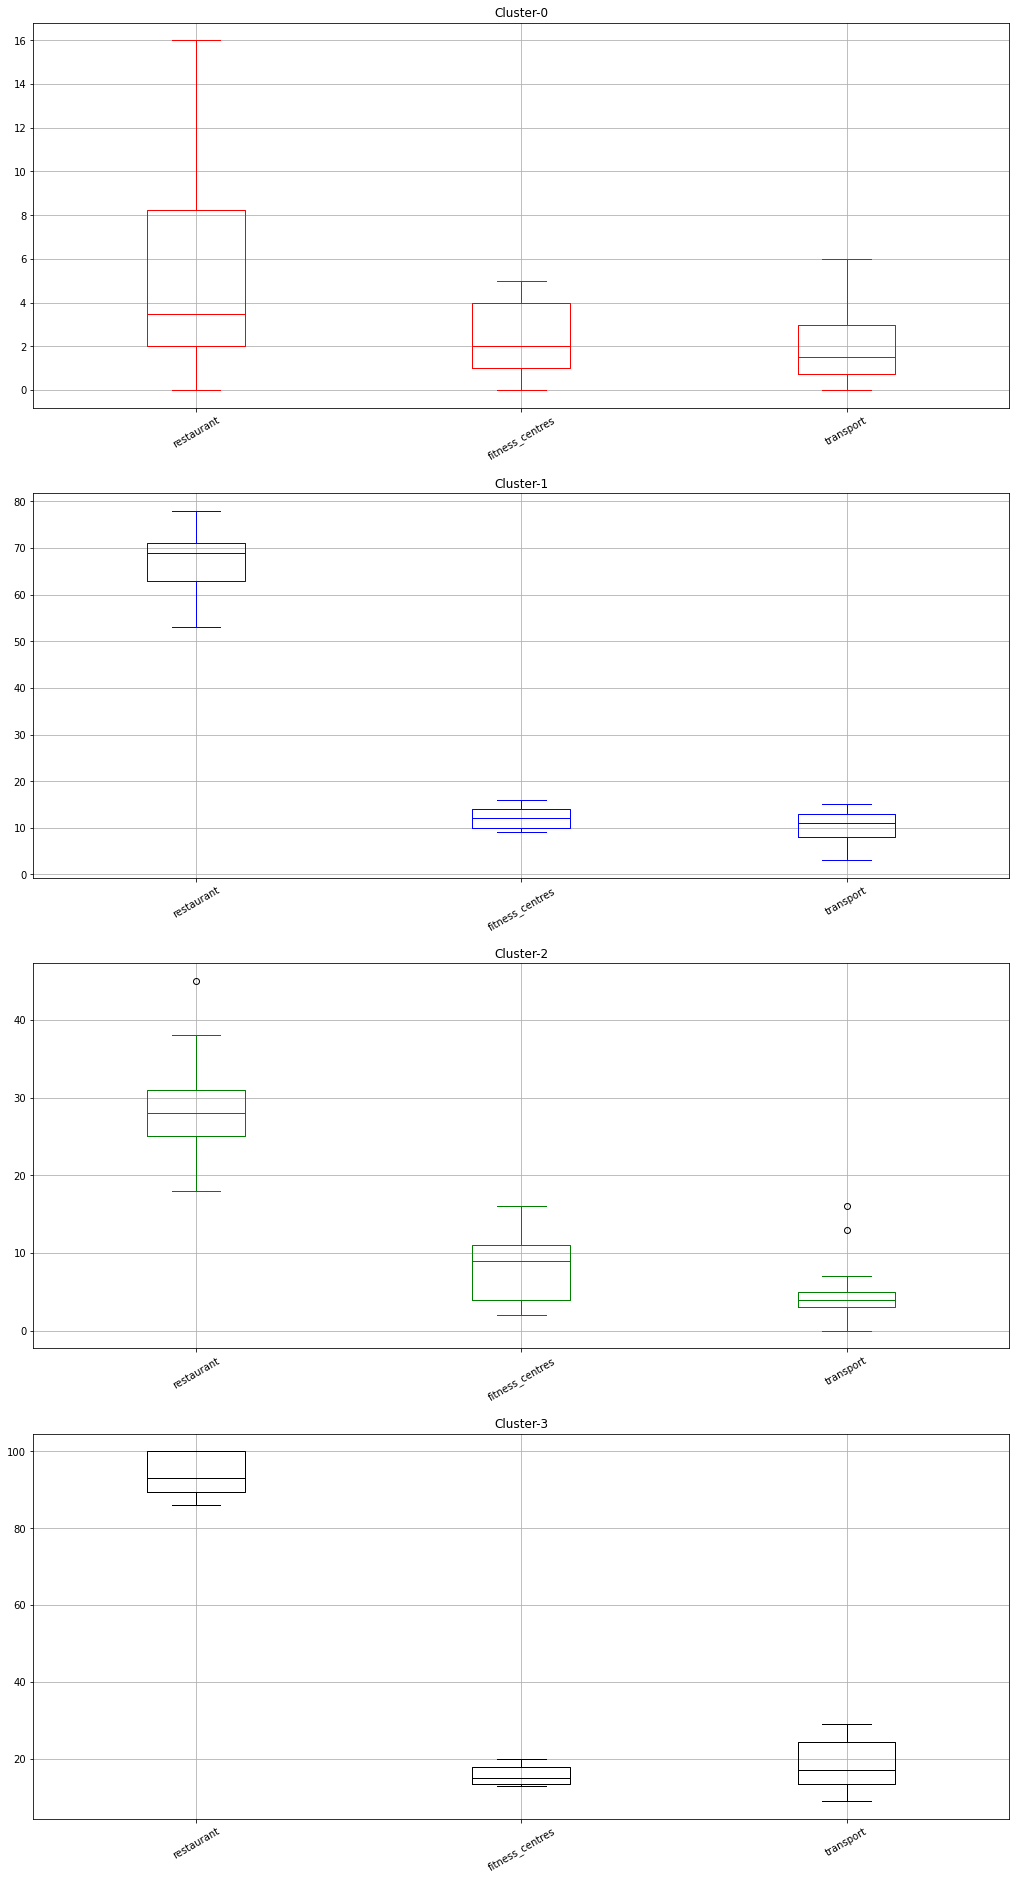

In [35]:
fig, axs = plt.subplots(4,figsize=(14,26), constrained_layout = True)

df1=neighbourhood[neighbourhood['cluster']==0.0].copy()
df2=neighbourhood[neighbourhood['cluster']==1.0].copy()
df3=neighbourhood[neighbourhood['cluster']==2.0].copy()
df4=neighbourhood[neighbourhood['cluster']==3.0].copy()

df1.drop(['cluster', 'lat', 'long', 'centroid'], axis=1, inplace=True)
df2.drop(['cluster', 'lat', 'long', 'centroid'], axis=1, inplace=True)
df3.drop(['cluster', 'lat', 'long', 'centroid'], axis=1, inplace=True)
df4.drop(['cluster', 'lat', 'long', 'centroid'], axis=1, inplace=True)

df1.boxplot(ax=axs[0], rot=30, color='r')
df2.boxplot(ax=axs[1], rot=30, color='b')
df3.boxplot(ax=axs[2], rot=30, color='g')
df4.boxplot(ax=axs[3], rot=30, color='k')

axs[0].title.set_text("Cluster-0")
axs[1].title.set_text("Cluster-1")
axs[2].title.set_text("Cluster-2")
axs[3].title.set_text("Cluster-3")

plt.show()

## ***Thankyou***